In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from ast import parse
from datetime import datetime
from operator import index

seattle_df = pd.read_csv('seattle-weather.csv', header=0, parse_dates=['date'], index_col=['date'])
seattle_df.head()

In [ ]:
seattle_df.dtypes

In [ ]:
seattle_df.index

What three month period has the most precipitation?

Lets start by looking at the precipitation for each day over the course of 2012-2015.

<AxesSubplot:xlabel='date'>

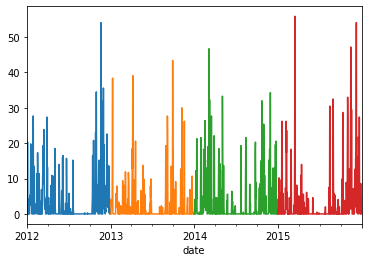

In [3]:
seattle_df.loc['2012']['precipitation'].plot()
seattle_df.loc['2013']['precipitation'].plot()
seattle_df.loc['2014']['precipitation'].plot()
seattle_df.loc['2015']['precipitation'].plot()

Looking at the graph we can see a pattern of high amounts of precipitation at the beginning and the end of each year. 
We will further examine the months September - May, except for the beggining of 2012 and the end of 2015 because of data restraints. 

<AxesSubplot:xlabel='date'>

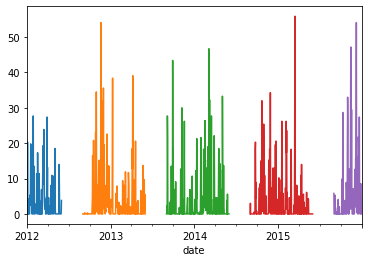

In [4]:

r1 = pd.date_range(start='2012-01-01', end='2012-05-31')
r2 = pd.date_range(start='2012-09-01', end='2013-05-31')
r3 = pd.date_range(start='2013-09-01', end='2014-05-31')
r4 = pd.date_range(start='2014-09-01', end='2015-05-31')
r5 = pd.date_range(start='2015-09-01', end='2015-12-31')

seattle_df.loc[r1]['precipitation'].plot()
seattle_df.loc[r2]['precipitation'].plot()
seattle_df.loc[r3]['precipitation'].plot()
seattle_df.loc[r4]['precipitation'].plot()
seattle_df.loc[r5]['precipitation'].plot()

After getting five different groups of nine months we can clearly see there is a spike or a high density from the 2nd, 3rd,4th, and 5th groups.
We will break these down for each year. First will be the period from 2012-2013. After anaylazing the graph we will also take the mean precipitation of each three month period.

<AxesSubplot:xlabel='date'>

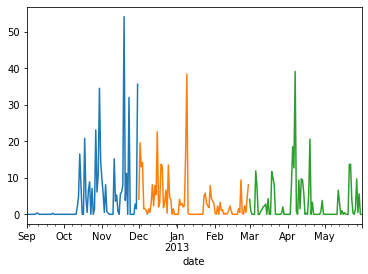

In [5]:
# Group 1 / 2012-2013
r6 = pd.date_range(start='2012-09-01', end='2012-11-30')
r7 = pd.date_range(start='2012-12-01', end='2013-02-28')
r8 = pd.date_range(start='2013-03-01', end='2013-05-31')

seattle_df.loc[r6]['precipitation'].plot()
seattle_df.loc[r7]['precipitation'].plot()
seattle_df.loc[r8]['precipitation'].plot()

In [ ]:
# seattle_df.loc[r6]['precipitation'].mean()
# seattle_df.loc[r7]['precipitation'].mean()
seattle_df.loc[r8]['precipitation'].mean()

<AxesSubplot:xlabel='date'>

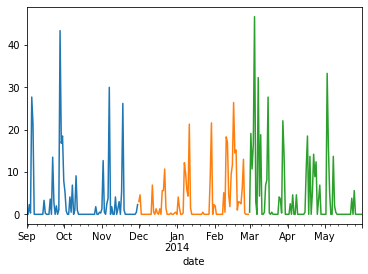

In [6]:
# Group 2 / 2013-2014
r9 = pd.date_range(start='2013-09-01', end='2013-11-30')
r10 = pd.date_range(start='2013-12-01', end='2014-02-28')
r11 = pd.date_range(start='2014-03-01', end='2014-05-31')

seattle_df.loc[r9]['precipitation'].plot()
seattle_df.loc[r10]['precipitation'].plot()
seattle_df.loc[r11]['precipitation'].plot()

In [ ]:
# seattle_df.loc[r9]['precipitation'].mean()
# seattle_df.loc[r10]['precipitation'].mean()
seattle_df.loc[r11]['precipitation'].mean()

<AxesSubplot:xlabel='date'>

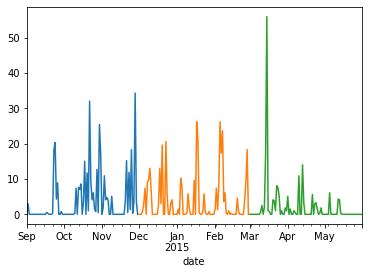

In [7]:
# Group 3 / 2014-2015
r12 = pd.date_range(start='2014-09-01', end='2014-11-30')
r13 = pd.date_range(start='2014-12-01', end='2015-02-28')
r14 = pd.date_range(start='2015-03-01', end='2015-05-31')

seattle_df.loc[r12]['precipitation'].plot()
seattle_df.loc[r13]['precipitation'].plot()
seattle_df.loc[r14]['precipitation'].plot()

In [ ]:
# seattle_df.loc[r12]['precipitation'].mean()
# seattle_df.loc[r13]['precipitation'].mean()
seattle_df.loc[r14]['precipitation'].mean()

<AxesSubplot:xlabel='date'>

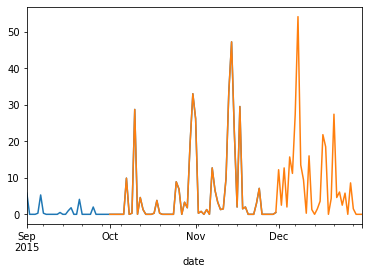

In [8]:
# Group 4 / 2015
r15 = pd.date_range(start='2015-09-01', end='2015-11-30')
r16 = pd.date_range(start='2015-10-01', end='2015-12-31')

seattle_df.loc[r15]['precipitation'].plot()
seattle_df.loc[r16]['precipitation'].plot()

In [ ]:
# seattle_df.loc[r15]['precipitation'].mean()
seattle_df.loc[r16]['precipitation'].mean()

After finding the mean precipitation

Group 1 / 2012-2013:
Septemember - November: 4.194
December - February: 3.555
March - May: 3.041

Group 2 / 2013-2014:
Septemember - November: 3.212
December - February: 3.239
March - May: 4.631

Group 3 / 2014-2015:
Septemember - November: 3.860
December - February: 3.877
March - May: 1.955

Group 4 / 2015:
Septemember - November: 3.913
October - December: 6.733

After conserdiation on the results from Group 4's October - December mean precipitation. I have decided to test this period of months for each group as well. I will also test the period of months February - April becuase of trends spotted from the graph.

In [ ]:
# Group 1
r17 = pd.date_range(start='2012-10-01', end='2012-12-31')
r18 = pd.date_range(start='2013-02-01', end='2013-04-30')

seattle_df.loc[r17]['precipitation'].plot()
seattle_df.loc[r18]['precipitation'].plot()

# Group 2
r19 = pd.date_range(start='2013-10-01', end='2013-12-31')
r20 = pd.date_range(start='2014-02-01', end='2014-04-30')

seattle_df.loc[r19]['precipitation'].plot()
seattle_df.loc[r20]['precipitation'].plot()


# Group 3
r21 = pd.date_range(start='2014-10-01', end='2014-12-31')
r22 = pd.date_range(start='2015-02-01', end='2015-04-30')

seattle_df.loc[r21]['precipitation'].plot()
seattle_df.loc[r22]['precipitation'].plot()

In [ ]:
# seattle_df.loc[r17]['precipitation'].mean()
# seattle_df.loc[r18]['precipitation'].mean()
# seattle_df.loc[r19]['precipitation'].mean()
# seattle_df.loc[r20]['precipitation'].mean()
# seattle_df.loc[r21]['precipitation'].mean()
seattle_df.loc[r22]['precipitation'].mean()

Group 1
October - December: 6.030
February - April: 5.632

Group 2
October - December: 1.933
February - April: 4.526

Group 3
October - December: 4.526
February - April: 3.362

What is the longest period of time that it goes without raining?
Lets use groupby and cumsum to filter the data to find consecutive enteries of sun being the weather.

In [9]:
# for k, v in seattle_df[seattle_df['weather'] == 'sun'].groupby((seattle_df['weather'] != 'sun').cumsum()):
#     print(f'[group {k}')
#     print(v)
#     print('\n')


# seattle_df.loc['2012'][seattle_df['weather'] == 'sun'].groupby((seattle_df['weather'] != 'sun').cumsum()).describe()
# seattle_df.loc['2013'][seattle_df['weather'] == 'sun'].groupby((seattle_df['weather'] != 'sun').cumsum()).describe()
# seattle_df.loc['2014'][seattle_df['weather'] == 'sun'].groupby((seattle_df['weather'] != 'sun').cumsum()).describe()
seattle_df.loc['2015'][seattle_df['weather'] == 'sun'].groupby((seattle_df['weather'] != 'sun').cumsum()).describe()


C:\Users\hayde\AppData\Local\Temp\ipykernel_26860\689654444.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  seattle_df.loc['2015'][seattle_df['weather'] == 'sun'].groupby((seattle_df['weather'] != 'sun').cumsum()).describe()


precipitation                                    temp_max             \
                count mean  std  min  25%  50%  75%  max    count       mean   
weather                                                                        
618               1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0      1.0   5.600000   
645               1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0      1.0  12.200000   
661               1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0      1.0  12.200000   
662               2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      2.0  14.150000   
664               4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      4.0  11.950000   
667               7.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      7.0  12.300000   
672               1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0      1.0  17.800000   
677               2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      2.0  15.600000   
683               1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0      1.0  20.600000   
684               2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      2.0  15.600000   
687               1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0      1.0  13.300000   
688               2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      2.0  14.750000   
690               2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      2.0  17.200000   
691               2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      2.0  12.500000   
693               6.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      6.0  18.900000   
694               1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0      1.0  15.600000   
700               6.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      6.0  17.950000   
702               4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      4.0  22.650000   
707               4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      4.0  20.575000   
708              11.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     11.0  21.781818   
710              12.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     12.0  25.933333   
711               3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      3.0  24.066667   
712               8.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      8.0  27.862500   
713               1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0      1.0  28.900000   
714               5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      5.0  33.100000   
715               1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0      1.0  27.200000   
716              15.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     15.0  26.706667   
720               7.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      7.0  31.571429   
721               3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      3.0  25.533333   
722               3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      3.0  29.066667   
723               1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0      1.0  28.300000   
724               4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      4.0  25.975000   
726               1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0      1.0  22.200000   
728               4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      4.0  26.800000   
731               1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0      1.0  18.900000   
732               3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      3.0  18.666667   
735               2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      2.0  23.600000   
736               2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      2.0  26.950000   
737               2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      2.0  17.250000   
739               2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      2.0  20.250000   
741               2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      2.0  19.750000   
743               4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      4.0  19.725000   
746               3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      3.0  21.833333   
751               1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0      1.0  17.800000   
755               1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0      1.0  20.000000   
773               1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0      1.0  10.000000   
789               1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0      1.0   8.900000   
792     

Highest consecutive enteries of sun for each year
2012:
    18 group 158
    10 group 170
2013:
    12 group 340
    17 group 364
2014:
    17 group 517
    14 group 539
2015:
    15 group 716
    12 group 710

The longest time it went without raining or another kind of precipitation was 18 days. This took place 12-08-22 to 12-09-08.

What is the average of max and min temperature does it rain the most?

In [6]:
# seattle_df[seattle_df['weather'] == 'rain'].groupby((seattle_df['weather'] != 'rain')).describe()
seattle_df[seattle_df['weather'] == 'rain'].describe()
# seattle_df[seattle_df['weather'] == 'rain'].plot()




,precipitation,temp_max,temp_min,wind
count,641.000000,641.000000,641.000000,641.000000
mean,6.557878,13.454602,7.588768,3.669891
std,8.647538,4.973029,3.951851,1.586126
min,0.000000,3.900000,-3.800000,0.500000
25%,1.000000,10.000000,4.400000,2.500000
50%,3.300000,12.800000,7.200000,3.400000
75%,8.600000,16.100000,10.000000,4.700000
max,55.900000,35.600000,18.300000,9.500000


The average max temperature it rains at is 13.45 degrees celsius while the average mininum temperature is 7.58.